In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima.model import ARIMA

In [14]:
df=pd.read_csv("TCS.NS.csv")
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index(df['Date'])
df.drop('Date',axis=1,inplace=True)
date_temp=pd.date_range(start="2002-08-12",end="2022-10-25",freq='D')
df=df.reindex(date_temp,fill_value=np.nan)
df.fillna(method='bfill',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
2002-08-12,38.724998,40.000000,38.724998,39.700001,29.062008,212976.0
2002-08-13,39.750000,40.387501,38.875000,39.162498,28.668533,153576.0
2002-08-14,39.250000,39.250000,35.724998,36.462502,26.692036,822776.0
2002-08-15,36.462502,36.462502,36.462502,36.462502,26.692036,0.0
2002-08-16,36.275002,38.000000,35.750000,36.375000,26.627970,811856.0


In [15]:
ts_data=pd.DataFrame(df['Close'])
ts_data.head()

,Close
2002-08-12,39.700001
2002-08-13,39.162498
2002-08-14,36.462502
2002-08-15,36.462502
2002-08-16,36.375000


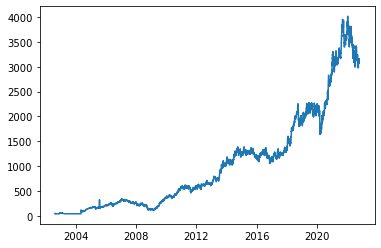

In [16]:
plt.plot(ts_data)

In [17]:
adfuller(ts_data)

(0.4960927774829978,
 0.98475385435503,
 23,
 7356,
 {'1%': -3.4312392854016696,
  '5%': -2.8619329956939263,
  '10%': -2.566979187311738},
 63627.14993296944)

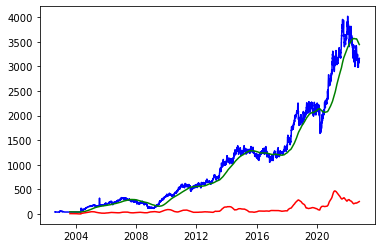

In [18]:
rol_mean = ts_data.rolling(window=365).mean()
rol_std = ts_data.rolling(window=365).std()

plt.plot(ts_data, c='blue')
plt.plot(rol_mean, c='green')
plt.plot(rol_std, c='red')

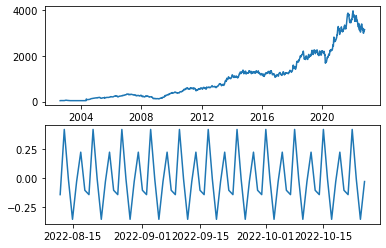

In [19]:
decompose=seasonal_decompose(ts_data)
trend=decompose.trend
season=decompose.seasonal

plt.subplot(211)
plt.plot(trend)
plt.subplot(212)
plt.plot(season[-75:])

In [20]:
df_new=ts_data['Close']-ts_data['Close'].shift(2)
df_new.dropna(inplace=True)
adfuller(df_new)

(-14.712475954089511,
 2.8333296479010625e-27,
 35,
 7342,
 {'1%': -3.4312409817177314,
  '5%': -2.861933745222677,
  '10%': -2.5669795862970988},
 63797.20741563518)

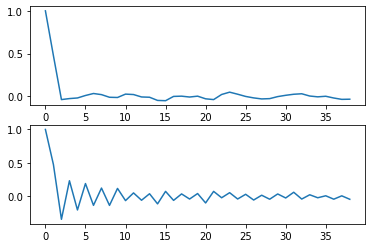

In [21]:
acf_plot = acf(df_new)
pacf_plot = pacf(df_new)

plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)

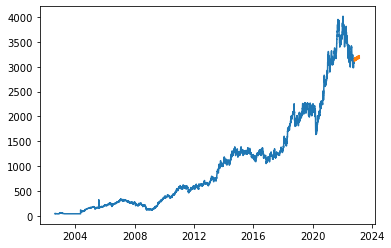

In [22]:
model=ARIMA(ts_data,seasonal_order=(2,2,2,7))
fit=model.fit()
forecast=pd.DataFrame(fit.forecast(120))

plt.plot(ts_data)
plt.plot(forecast)